# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import sklearn.model_selection as ms
import sklearn.feature_selection as fs

import statsmodels.api as sm
import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.stats as sms
import statsmodels.stats.outliers_influence as oi
import sklearn.linear_model as lm
import sklearn.metrics as skm

# 2. Collect and load data

In [2]:
pop=pd.read_csv('bigcity.csv')
pop.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


Cities(Column Name) Need To Be Renamed

In [3]:
pop.rename({'Unnamed: 0':'Cities'},axis=1,inplace=True)

In [4]:
pop

,Cities,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


# 3. Explore numeric variables - five number summary

In [5]:
pop.describe()

,Cities,u,x
count,49.00000,49.000000,49.000000
mean,25.00000,103.142857,127.795918
std,14.28869,104.405061,123.121211
min,1.00000,2.000000,46.000000
25%,13.00000,43.000000,58.000000
50%,25.00000,64.000000,79.000000
75%,37.00000,120.000000,130.000000
max,49.00000,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

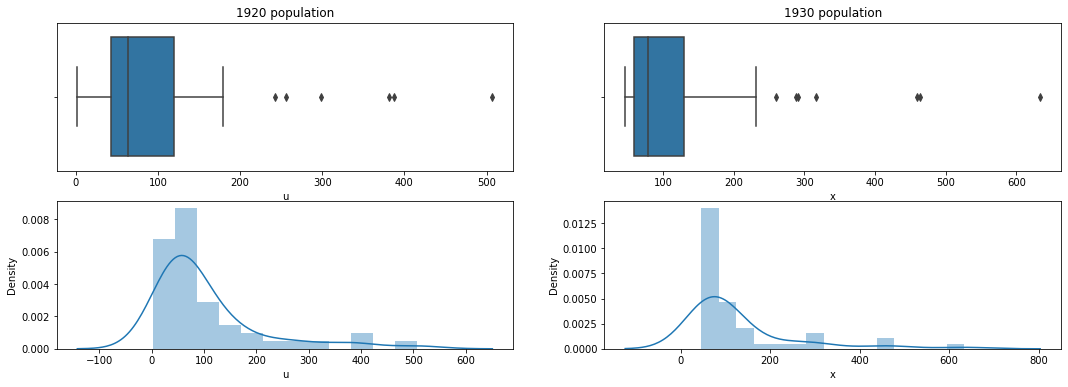

In [6]:
fig,axes=plt.subplots(2,2,figsize=(18,6))
sns.boxplot(x='u',data=pop,ax=axes[0][0])
sns.boxplot(x='x',data=pop,ax=axes[0][1])
sns.distplot(a=pop['u'],ax=axes[1][0])
sns.distplot(a=pop['x'],ax=axes[1][1])
axes[0][0].set_title('1920 population')
axes[0][1].set_title('1930 population')
plt.show()

INFERENCE:BOTH 1920 AND 1930 POULATION IN CITIES IS NOTNORMAL.DATA IS POSITIVELY SKEWED(RIGHT SKEWED DATA)

In [7]:
print('Standard Deviation of 1920 population:',np.std(pop['u']))
print('Standard Deviation of 1930 population:',np.std(pop['x']))
print('Variance of 1920 population:',np.var(pop['u']))
print('Variance of 1930 population:',np.var(pop['x']))

Standard Deviation of 1920 population: 103.33421110006823
Standard Deviation of 1930 population: 121.85839550383406
Variance of 1920 population: 10677.959183673465
Variance of 1930 population: 14849.468554768846


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

Scatterplot

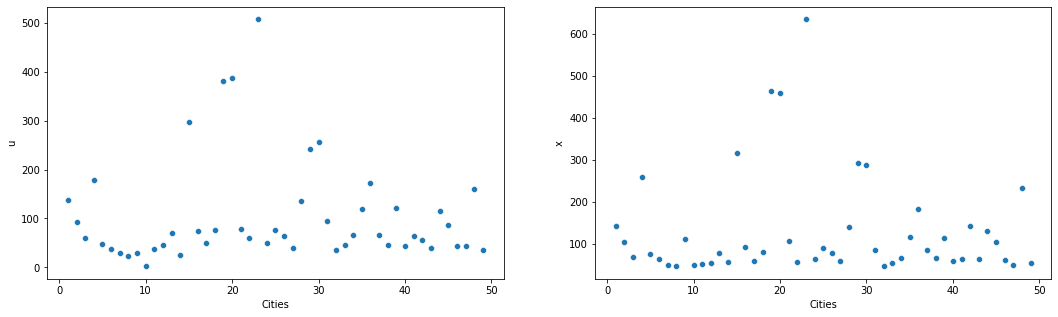

In [8]:
fig,axes=plt.subplots(1,2,figsize=(18,5))
sns.scatterplot(x=pop['Cities'],y=pop['u'],ax=axes[0])
sns.scatterplot(x=pop['Cities'],y=pop['x'],ax=axes[1])
plt.show()

INFERENCE POPULATION PATTERN BETWEEN CITIES IN 1920 AND 1930 LOOKS SIMILAR

Two-way cross tabulations

In [9]:
pop.set_index(keys=pop['Cities'],inplace=True)
pop.drop(columns=['Cities'],inplace=True)

In [10]:
pop.T

Cities,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
u,138,93,61,179,48,37,29,23,30,2,...,44,64,56,40,116,87,43,43,161,36
x,143,104,69,260,75,63,50,48,111,50,...,58,63,142,64,130,105,61,50,232,54


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [11]:
print('Number of rows in the dataset:',pop.shape[0])
x=pop.drop(['x'],axis=1)#INDEPENDEND VARIABLE
y=pop['x']#DEPENDEND VARIABLE(TARGET COLUMN)

Number of rows in the dataset: 49


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [12]:
print('THE SUM OF NULL VALUES is:',pop.isna().sum())
print('THE CORRELATION BETWEEN CITIES IN 1920 AND 1930 is:',pop.corr())

THE SUM OF NULL VALUES is: u    0
x    0
dtype: int64
THE CORRELATION BETWEEN CITIES IN 1920 AND 1930 is:           u         x
u  1.000000  0.981742
x  0.981742  1.000000


High correlation between Cities in u(1920 Population) and x(1930 Population) indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [13]:
xtrain,xtest,ytrain,ytest=ms.train_test_split(x,y,test_size=0.2,random_state=1)#Split Train -80%,Test-20%
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(39, 1)
(10, 1)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [14]:
linreg=lm.LinearRegression()
linreg.fit(xtrain,ytrain)
print('Intercept (b0) is:',linreg.intercept_)
print('Slope/Coefficient (b1) is:',linreg.coef_)

Intercept (b0) is: 9.718455322828262
Slope/Coefficient (b1) is: [1.15945123]


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

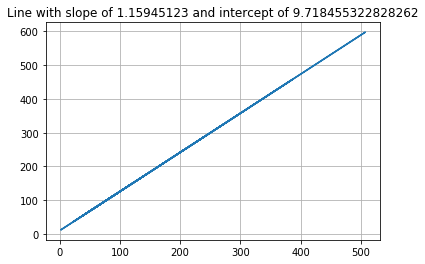

In [15]:
#Linear Relation Equation:Y=MX+C (Y-DEPENDEND VARIABLE(TARGET COLUMN),X-INDEPENDEND VARIABLE,M-SLOPE,C-INTERCEPT)
plt.plot(xtrain['u'],(xtrain['u']*linreg.coef_)+linreg.intercept_) #y=mx+c
plt.grid()
plt.title('Line with slope of '+str(linreg.coef_)[1:-1]+' and intercept of '+str(linreg.intercept_))
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [16]:
print('R2 score for train data:',skm.r2_score(ytrain,linreg.predict(xtrain)))
print('R2 score for test data:',skm.r2_score(ytest,linreg.predict(xtest)))
print('Root Mean Squared Error (RMSE) for train data:',np.sqrt(skm.mean_squared_error(ytrain,linreg.predict(xtrain))))
print('Root Mean Squared Error (RMSE) for test data:',np.sqrt(skm.mean_squared_error(ytest,linreg.predict(xtest))))

R2 score for train data: 0.9682175540860046
R2 score for test data: 0.9181922560396981
Root Mean Squared Error (RMSE) for train data: 23.18943724391406
Root Mean Squared Error (RMSE) for test data: 23.385235190249123


THE RMSE FOR MODEL IS SAME FOR BOTH TRAIN AND TEST.HENCE THE MODEL IS FIT

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [17]:
print('Score for train data:',linreg.score(xtrain,ytrain))
print('Score for test data:',linreg.score(xtest,ytest))

Score for train data: 0.9682175540860046
Score for test data: 0.9181922560396981


THE SCORE FOR MODEL IS SAME FOR BOTH TRAIN AND TEST.HENCE THE MODEL IS FIT